In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
def collect_loss(nohup_file):
    steps = []
    loss1 = []
    loss2 = []
    with open(nohup_file, 'r') as f:
        for line in f.readlines():
            if line[0] in "0123456789":  # the line with loss, rate, seconds, images
                tokens = line.strip().split()
                steps.append(int(tokens[0][:-1]))  # number of steps
                loss1.append(float(tokens[1][:-1]))  # loss
                loss2.append(float(tokens[2]))  # loss average
    return steps, loss1, loss2

# steps 38797


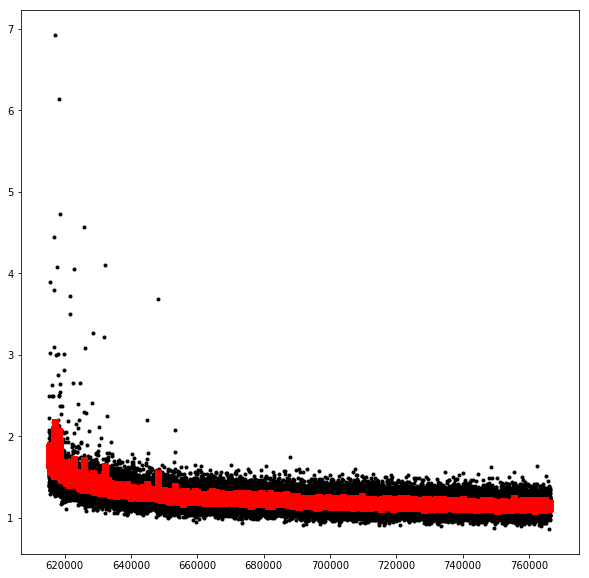

In [11]:
# nohup = "/home/ssd0/Develop/liyu/darknet/nohup.out"
# nohup = "/home/hdd0/Develop/algo/yolo-pre-trained/darknet/nohup.out"
nohup = "/home/unicorn/Documents/liyu/darknet/nohup.out"
steps, loss1, loss2 = collect_loss(nohup)
print("# steps", len(steps))

# plot trend
fig, ax = plt.subplots(1, 1, figsize=(10,10))

start, end = 1000, len(steps)

ax.scatter(steps[start:end], loss1[start:end], marker='.', color='black')
ax.scatter(steps[start:end], loss2[start:end], marker='s', color='red')

plt.show()